<a href="https://colab.research.google.com/github/BelideSaiTeja/DL/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING WITH NEURAL NETWORKS**

Deep Learning with Neural Networks and TensorFlow. The artificial neural network is a biologically-inspired methodology to conduct machine learning, intended to mimic brain (a biological neural network).

a model of an artificial neuron that looks like...

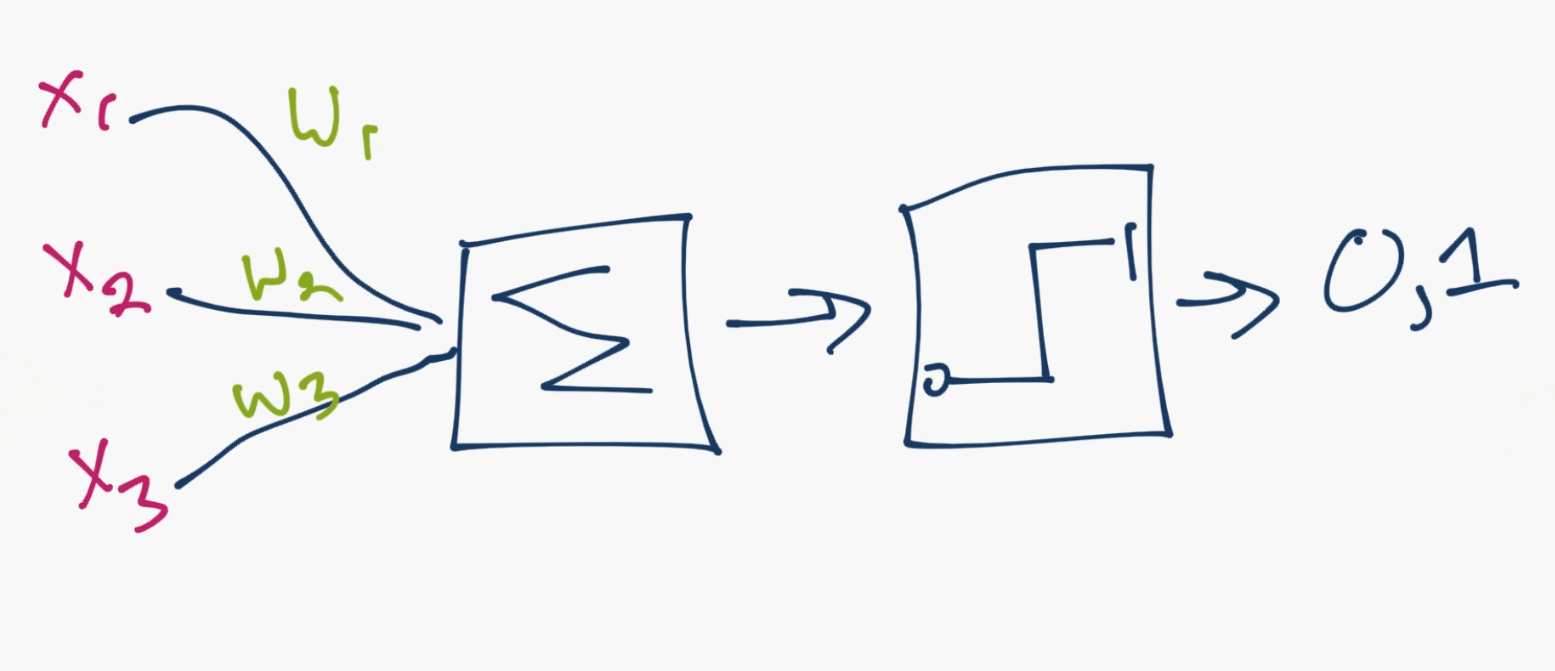

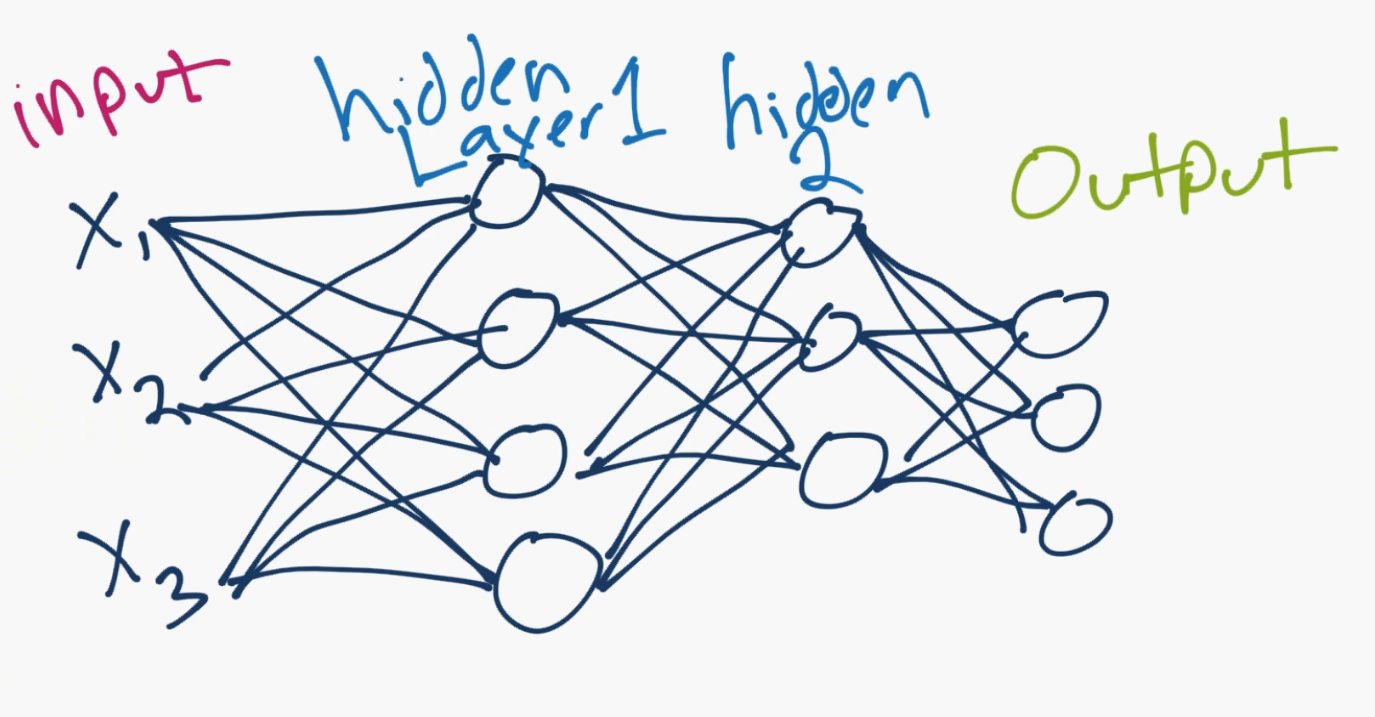

The circles are **neurons or nodes**, with their functions on the data and the lines connecting them are the weights/informating being passed along. Each column is a **layer**. The first layer of your data is the **input layer**. Then, unless your output is your input, you have at least one **hidden layer**. If you just have one hidden layer, then you have a **regular artificial neural network**. If you elect to have many hidden layers, you have yourself a **deep neural network**.

For simple classification, Neural Networks performance is almost similar to that of other classification Algorithms.

For example, if SVM has accuracy of 97%, then NeuralNetworks might have accuracy of 98% or 99%.


**why neural networks are ahead of classical machine learning algorithms ?**

Neural networks, specifically deep learning models, have gained significant attention and popularity in recent years due to their ability to outperform classical machine learning algorithms in various domains. Here are some reasons why neural networks are often considered ahead of classical machine learning algorithms:

1. Representation learning: Neural networks are capable of automatically learning hierarchical representations of data. Unlike classical machine learning algorithms, which often require manual feature engineering, neural networks can learn features and representations directly from raw or minimally preprocessed data. This ability to automatically learn relevant features makes neural networks more flexible and adaptable to different types of data.

2. Handling complex data: Neural networks excel at handling complex data structures, such as images, audio, and text. They can capture intricate patterns and relationships within these data types, thanks to their ability to model nonlinear and high-dimensional relationships. Classical machine learning algorithms, on the other hand, may struggle with such complex data and may require significant feature engineering or domain-specific knowledge to achieve comparable performance.

3. Scalability: Neural networks are highly scalable. They can be trained on large datasets with millions of samples and thousands of features, making them suitable for big data scenarios. Additionally, neural networks can benefit from parallel processing using GPUs or distributed computing frameworks, enabling faster training and inference times.

4. End-to-end learning: Neural networks enable end-to-end learning, where the model learns directly from input to output without relying on intermediate steps or handcrafted rules. This characteristic simplifies the overall pipeline and reduces the need for manual intervention, potentially leading to more efficient and streamlined solutions.

5. Performance on complex tasks: Neural networks have demonstrated superior performance on various complex tasks, including image and speech recognition, natural language processing, and reinforcement learning. The ability of neural networks to learn intricate representations and capture subtle patterns has contributed to breakthroughs in these domains, pushing the boundaries of what is achievable with classical machine learning algorithms.

While neural networks have many advantages, it is important to note that classical machine learning algorithms still have their merits and are often more interpretable and computationally efficient for certain tasks. Choosing between neural networks and classical machine learning algorithms depends on the specific problem, available data, interpretability requirements, and computational constraints.

**TensorFlow Basics - Deep Learning with Neural Networks**

Tensorflow -->Deep Learning library which has tons of pre-built functions which are used in Deep Learning.

In [ ]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [ ]:
# Importing dataset
# 28x28 images of digits from 0-9

mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train[0])

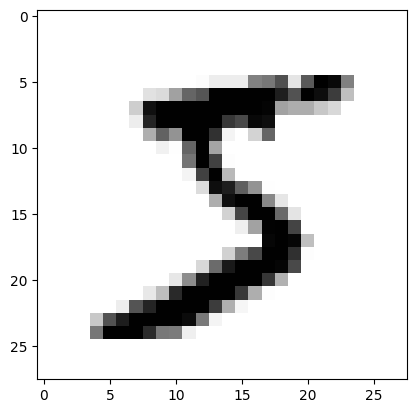

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap= plt.cm.binary)
plt.show()

Normalize the data

In [ ]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

In [ ]:
X_train[0]

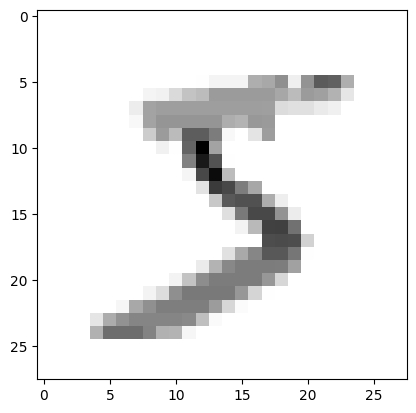

In [ ]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

**BUILDING A MODEL**

Activation Functions to be used:

**Sigmoid Function** --> For binary Classification Output

**Softmax Activation Function** --> Output has multiple values (classification type)

**Linear Activation Function** --> Output which can be either +ve or -ve

**ReLU Activation Function** --> Output which has only +ve values



Most common function used in **hidden layers** is **relu**

sigmoid --> little bit slower, goes flat on both sides of y-axis

relu --> little bit faster, goes flat on -ve side of the axis

For the **Output Layers**

Binary Classification : sigmoid

Classification with multiple outputs (eg. digits classification) : softmax

Regression with Output has +ve or -ve : linear

Regression with Output has +ves : relu



**Implementation**

In [ ]:
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Flatten())  # for input layer i.e., flat
# Hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 128 neurons, function relu --> Rectified Linear
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 128 neurons, function relu --> Rectified Linear
# Output layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # 10 neurons i.e., output values are 0-9 , function --> Softmax

# Compile

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2606 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1056 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0726 - accuracy: 0.9765


In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.0846 - accuracy: 0.9750
0.08462289720773697 0.9750000238418579


In [ ]:
predictions = model.predict(X_test)  # output will be the predictions
predictions

313/313 [==============================] - 1s 2ms/step


array([[5.19297281e-08, 2.50350013e-07, 2.85335182e-06, ...,
        9.99988735e-01, 5.53436870e-08, 5.75077365e-06],
       [5.48470439e-07, 1.22281665e-06, 9.99940455e-01, ...,
        1.39661900e-08, 2.34864783e-05, 4.36587051e-11],
       [2.85339441e-09, 9.99865055e-01, 2.01713683e-05, ...,
        5.68268479e-05, 5.06275273e-06, 2.95296644e-07],
       ...,
       [7.21428861e-10, 3.39481083e-08, 2.76908363e-08, ...,
        1.39534444e-04, 6.66128399e-05, 1.37702108e-03],
       [9.60140056e-09, 1.13517755e-08, 4.45348158e-09, ...,
        1.60189231e-08, 1.73569846e-04, 6.05860322e-08],
       [3.30331090e-07, 4.95169331e-07, 2.14096099e-06, ...,
        1.45513213e-10, 7.86884957e-09, 1.04270725e-09]], dtype=float32)

In [ ]:
# to get the actual output required

import numpy as np
np.argmax(predictions[10])

0

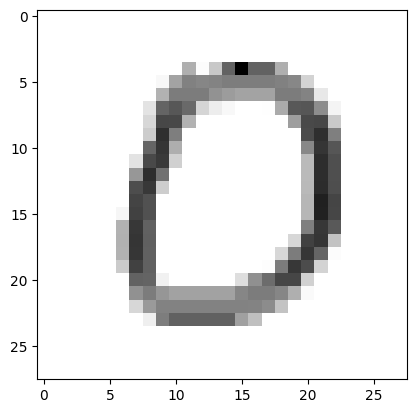

In [ ]:
plt.imshow(X_test[10], cmap = plt.cm.binary)
plt.show()

**DATA AUGMENTATION USING KERAS**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
img = load_img('/content/Dog.jpg')
X = img_to_array(img)
X = X.reshape((1,) + X.shape)

The .flow() command below generates batches of randomly transformed images
 and saves the results to the `preview/` directory

In [ ]:
i = 0
for batch in datagen.flow(X, batch_size = 1,
                          save_to_dir = 'preview', save_prefix = 'dog', save_format = 'jpeg'):
  i += 1
  if i > 25:        # this lets the datagenerator to create 25 number of variations (optional)
    break

**Creating CNN model and Optimize using Keras Tuner**

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

In [ ]:
def build_model(hp):
  model = keras.Sequential([
      # first convolution input layer
      keras.layers.Conv2D(
          filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
          kernel_size = hp.Choice('conv_1_Kernel', values = [3, 5]),
          activation = 'relu',
          input_shape = (28, 28, 1)
      ),
      # second convultion input layer
      keras.layers.Conv2D(
          filters = hp.Int('conv_2_filter', min_value = 32, max_value = 64, step = 16),
          kernel_size = hp.Choice('conv_2_Kernel', values = [3, 5]),
          activation = 'relu'
      ),
      # flatten layer to converts 3D to 1D
      keras.layers.Flatten(),
      # first Dense layer @outpt
      keras.layers.Dense(
          units = hp.Int('dense_1_units', min_value = 32, max_value = 64, step = 16),
          activation = 'relu'
      ),
      # Output layer with Neurons = no. of classes
      keras.layers.Dense(10, activation = 'softmax')
  ])
  # model compilation using optimizer, calculating loss and sp. metrics
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-15-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
tuner_search = RandomSearch(build_model,
                            objective = 'val_accuracy',
                            max_trials = 5,
                            directory = 'output',
                            project_name = 'Mnist Fashion')

In [ ]:
train_labels.shape

In [ ]:
tuner_search.search(train_images, train_labels, epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.9083333611488342

Best val_accuracy So Far: 0.9120000004768372
Total elapsed time: 00h 03m 04s


In [ ]:
model = tuner_search.get_best_models(num_models = 1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 48)                1769520   
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,788,826
Trainable params: 1,788,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.1, initial_epoch = 3)

Epoch 4/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1417 - accuracy: 0.9474 - val_loss: 0.2539 - val_accuracy: 0.9133
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1036 - accuracy: 0.9617 - val_loss: 0.2763 - val_accuracy: 0.9145
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9721 - val_loss: 0.3019 - val_accuracy: 0.9123
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0535 - accuracy: 0.9805 - val_loss: 0.3718 - val_accuracy: 0.9143
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0425 - accuracy: 0.9847 - val_loss: 0.4394 - val_accuracy: 0.9137
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.4596 - val_accuracy: 0.9122
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0255 - accuracy: 0.9909 - val_loss: 0.4360 - val_accurac